
# 6:  Random Walks, Lorentzians and Power Laws:

These problems are provided as Jupyter notebooks, so that you can edit your own version and include some simple calculations. You don't have to - you can do your own calculations any way you like - but it will get you used to doing statistics calculations with Python, which will gradually be more powerful in later weeks.


This is the version with solutions.  The solutions are illustrated by python codes and graphs. You should be able to write these codes yourself in the Computing courses, but in this course its fine to get generative AI to do it for you. 

**Python setup**

Once again, lets start by loading up some standard Python modules.

In [2]:
from math import *  # basic maths routines
import numpy as np  # more advanced maths routines
from scipy import stats, special # stats routines, e.g. binomial and Poisson distributions and to get erfinv later
import random
import matplotlib.pyplot as plt

# Level 1 Problems: simple calculations
These are what you might call "plug-in" problems. If you identify the concept or key formula that applies, it should be a fairly simple calculation to get the right answer.

### P6.1 Particles drifting in one dimension 
A large number of particles are constrained to move in one dimension, and each independently take a series of random steps backwards and forwards, of size 1$\mu$m. After a million steps, what will be the mean position of the resulting cloud of particles?  What is their mean distance from the point of origin?  What is their root mean squared distance from the point of origin? 

**Solution**  
This is just a 1D random walk problem with $a=1\mu$m and $n=10^6$.   
The mean position will $\mu=0$.   
The standard deviation is $\sigma=a\sqrt{n}=1$mm, this is like the "error on the mean": how far away to I expect to be.

The mean distance is $$ \frac{1}{\sqrt{2\pi}} \int |x| \exp(-x^2/2\sigma^2)dx = \sqrt{\frac{2}{\pi}}=0.798mm$$


In [4]:
##Simulate Using mm units
print("Theory: +-1mm")
steps=1000000
#  run 10 simulated walks
for n in range(1,10):
 distance=0
 for i in range(1,steps+1):
   distance += random.randint(0,1)
### compensate for only stepping forwards, ensure step length is +-1    
 print("Sample:",n, (2*distance-steps)/1000,"mm")
    

Theory: +-1mm
Sample: 1 0.154 mm
Sample: 2 -0.98 mm
Sample: 3 0.64 mm
Sample: 4 1.302 mm
Sample: 5 -1.148 mm
Sample: 6 -0.17 mm
Sample: 7 0.68 mm
Sample: 8 0.592 mm
Sample: 9 0.662 mm


### P6.2 Particles drifting in three dimensions 
The same particles are now allowed to move in three dimensions, with each step being randomly in any of $x,y,z$. After a million steps, what $x,y,z$ co-ordinate will the resulting cloud of particles be centred on? What will be the mean distance of a particle from the point of origin? 

**Solution**  
The cloud of particles will be centred on (0,0,0), just like for the 1D problem. However for the mean distance question, we need the radial density distribution, that has the extra factor of $R^2$. 

$$p_{3D}(R) = \frac{4\pi R^2}{
(2\pi\sigma^2)^{3/2}} \exp(−R^2/2\sigma^2)$$
with $$\sigma^2= na^2$$
so $$\mu = \int R .p_{3D}(R) dR$$

The integral is fiddly, we'll leave that for mathematics classes.
From the notes, the mean value is $\mu= \frac{4\sigma}{\sqrt{2\pi}}=a\sqrt{8n/\pi}$



mean distance=  1.6 mm


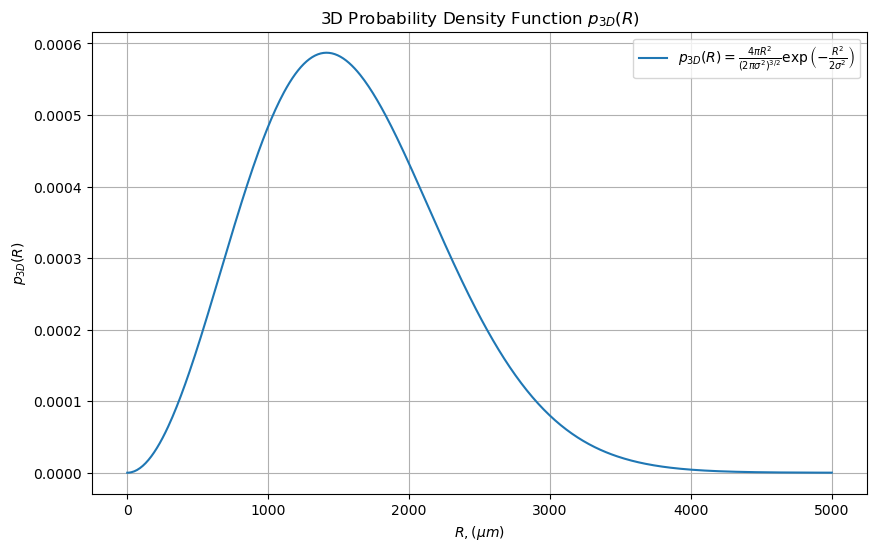

In [13]:
a=1. # step size in microns
n=1.e6 # no. of steps
mu= a * sqrt(8.*n/pi) # mean in microns
mumm=mu/1000. # mean in mm
print("mean distance= ",round(mumm,2),"mm")

#  Of course, you can get chatGPT to code it for you


sigma = sqrt(n)*a # Standard deviation is sqrt(N)

# Define the function p_3D(R)
def p_3D(R, sigma):
    return (4 * np.pi * R**2 / (2 * np.pi * sigma**2)**(3/2)) * np.exp(-R**2 / (2 * sigma**2))

# Generate values for R
R = np.linspace(0, 5000, 500)
p_values = p_3D(R, sigma)

# Plot the function
plt.figure(figsize=(10, 6))
plt.plot(R, p_values, label=r'$p_{3D}(R) = \frac{4\pi R^2}{(2\pi\sigma^2)^{3/2}} \exp\left( -\frac{R^2}{2\sigma^2} \right)$')
plt.xlabel(r'$R, (\mu m)$')
plt.ylabel(r'$p_{3D}(R)$')
plt.title(r'3D Probability Density Function $p_{3D}(R)$')
plt.legend()
plt.grid(True)
plt.show()


### P6.3 Waiting for a ride 
A hitchhiker is on a quiet country road, where cars are going past once every 7 minutes on average. If we assume that cars are arriving at random, what is the probability a car will come past in the next 2 minutes?

**Solution**  
We need the cumulative version of the waiting time distribution, $P_0(t)=e^{-\lambda t}$. That is the probability there is *no* event within time $t$ for rate $\lambda$. What we want then is $P=1-P_0$ for $t=2$

Probability of car within two minutes=  0.25


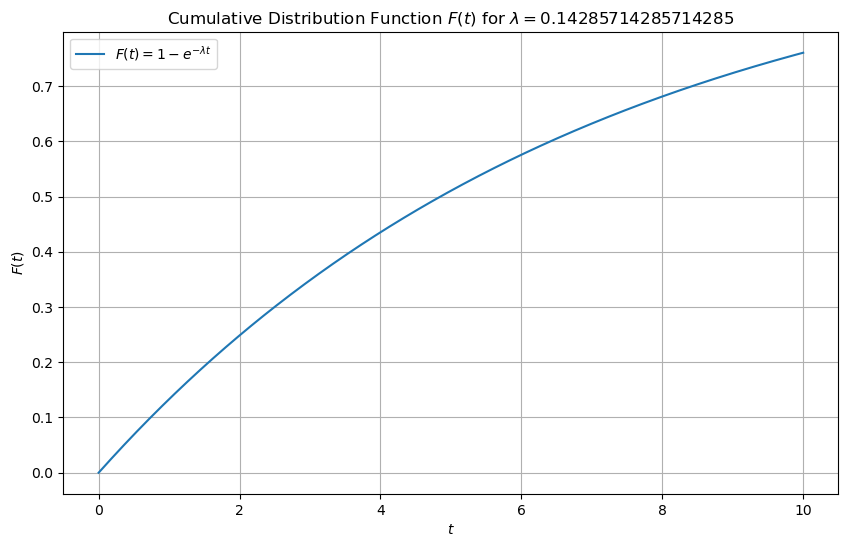

In [16]:
# Define the waiting time distribution function P_0(t)
def P_0(t, lambda_rate):
    return np.exp(-lambda_rate * t)

# Define the CDF function F(t)
def F(t, lambda_rate):
    return 1 - P_0(t, lambda_rate)


lambda_rate = 1./7  # rate per minute, note that lambda is a special function in python
t=2.  # waiting time
P=1. - exp(-lambda_rate*t)

print("Probability of car within two minutes= ", round(F(t,lambda_rate),2))

# Generate values for t
t = np.linspace(0, 10, 500)
F_values = F(t, lambda_rate)

# Plot the CDF
plt.figure(figsize=(10, 6))
plt.plot(t, F_values, label=r'$F(t) = 1 - e^{-\lambda t}$')
plt.xlabel(r'$t$')
plt.ylabel(r'$F(t)$')
plt.title(rf'Cumulative Distribution Function $F(t)$ for $\lambda = {lambda_rate}$')
plt.legend()
plt.grid(True)
plt.show()


### P6.4 Lorentzian fall-off 
For a Lorentzian distribution, what is the ratio of the probability density at 1.5 times the FWHM from the centre? compared to the maximum value? How does this compare with a Gaussian of the same mean and FWHM?

**Solution**  
You can just calculate manually by plugging in numbers, but a code will be more useful in the long run.
scipy.stats has a built-in Cauchy function, but here we'll write our own as a standard Lorentzian formula is in terms of $\Gamma$=FWHM.

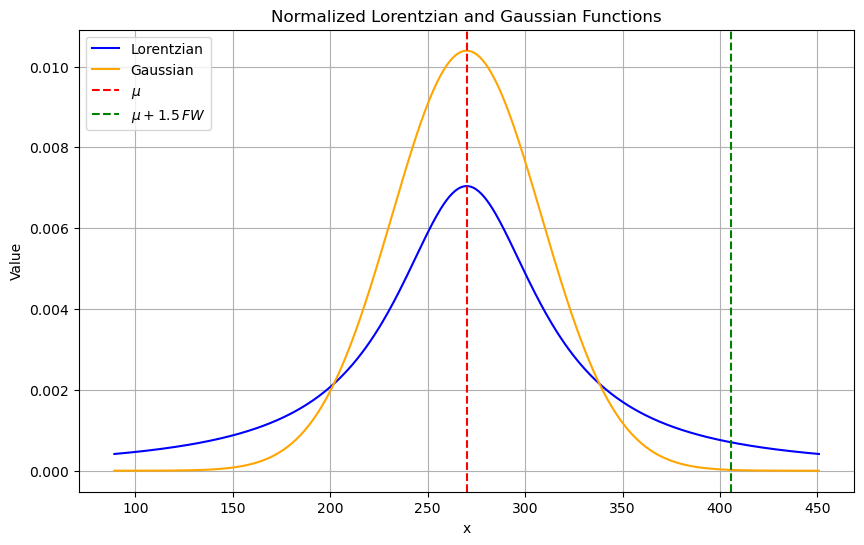

In [18]:
import numpy as np
import matplotlib.pyplot as plt

# Define a normalized Lorentzian function
def Lor(x, mu, G):
    dum1 = G / 2
    dum2 = (x - mu) * (x - mu) + dum1 * dum1
    f = dum1 / (np.pi * dum2)
    return f

# Define a normalized Gaussian function
def Gaussian(x, mu, sigma):
    return (1 / (sigma * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - mu) / sigma) ** 2)

# Parameters
mu = 270.0
FW = 90.4

# Calculate sigma from FWHM for Gaussian
sigma = FW / (2 * np.sqrt(2 * np.log(2)))

# Generate values for x
x_values = np.linspace(mu - 2 * FW, mu + 2 * FW, 500)
lor_values = Lor(x_values, mu, FW)
gaussian_values = Gaussian(x_values, mu, sigma)

# Plot the Lorentzian and Gaussian functions
plt.figure(figsize=(10, 6))
plt.plot(x_values, lor_values, label=r'Lorentzian', color='blue')
plt.plot(x_values, gaussian_values, label=r'Gaussian', color='orange')
plt.axvline(mu, color='red', linestyle='--', label=r'$\mu$')
plt.axvline(mu + 1.5 * FW, color='green', linestyle='--', label=r'$\mu + 1.5 \, FW$')
plt.xlabel('x')
plt.ylabel('Value')
plt.title('Normalized Lorentzian and Gaussian Functions')
plt.legend()
plt.grid(True)
plt.show()


For the Gaussian version, we just need to use the fact that FWHM=$2.355\sigma$

In [ ]:
sig=FW/2.355
x=mu; fmax=stats.norm.pdf(x,mu,sig)
x=mu+1.5*FW; f3=stats.norm.pdf(x,mu,sig)
ratio=f3/fmax
print("Gaussian fmax=",round(fmax,4))
print("f at mu+1.5FW=",round(f3,4))
print("ratio=",round(ratio,4))

You can see how the normalised Lorentzian is a little lower at the centre, but has much fatter tails...

# Level 2 Problems: formulating problems
These are more like real-world problems. The key skill is being able to translate a physical description into appropriate mathematics, and then identifying the concepts and formulae you need to apply. Sometimes at that point its a straightforward calculation, but more often you need a bit more mathematical manipulation, keeping the physical meaning in mind, and then finally calculating.   

### P6.5 Gambler's ruin 
A gambling game, one wins £1 with 50% probability, and loses £1 with 50%.  How many times must you play before there is about a one in fifty chance (0.02) of having £100.  Try to use your knowledge to get a rough pen and paper answer,  then calculate it more accurately with Gaussian Integrals and the error function.  Finally, compare the answers using python's stats.binom.cdf .

**Solution**  
 
The money gain/loss (M) is $M(n,r)=(2r-n)$ after $n$ trials with $r$ wins.  $r$ follows a binomial (coin-toss type) distribution, with mean zero and s.d. $\sigma_r=\sqrt{np(1-p)} = \sqrt{n}/2$.  But since $M(n,r)=(2r-n)$, the standard deviation of the money (i.e. of $2r$) is twice as big: $\sigma_M= \sqrt{n}$.

Its pretty obvious that a large number of steps $n$ will be needed, so we can assume that $p(x)$ will be close to Gaussian, with s.d. $\sigma=\sqrt{n}$ pounds. 

We are looking for a positive outlying result with a 2% chance: this is approximately $2\sigma$, (95.45% of the gaussian is within $2\sigma$, the remaining 4.55% covers big gains and losses). So our first guess
is $100=2\sqrt{n}$, $n=2500$

To get more accuracy, we will need the Gaussian cumulative distribution function (more precisely, its inverse).  This cannot be written in analytic form, but it is coded in the stats package as a "Percent Point Function" or PPF.

To get the right answer, we can use the binonimal distribution instead of the Gaussian approximation.  This turns out not to be a one-liner in python.  Rather, we make a guess for n, and test the probablity . Compare the your guess to the gaussian approximation?  

In [42]:
from scipy.stats import norm, binom
import math
# We want the percentile at 98% Use a Gaussian with mean zero and variance 1
z = norm.ppf(0.98,0,1)
print("The z value for which P(Z <= z) = 0.98 is approximately:", z)
sigma = 100/z  #  Convert sigma to the required units

print("Required number of bets (Gaussian Approximation)=",round(sigma*sigma,0)) # finally remember that sigma is that square root of tha number of steps


# Parameters for binomial calculation
n = round(sigma*sigma,0)
#n=2500
p = 0.5
wins = math.ceil(n/2+50)
losses=n-wins
print("gain=", wins-losses )

# Calculate the probability of getting at most 5100 heads
prob_100 = 1- binom.cdf(wins, n, p)

print(f"Probability of getting more than", wins, " heads in ",n," tosses:" ,prob_100)





The z value for which P(Z <= z) = 0.98 is approximately: 2.0537489106318225
Required number of bets (Gaussian Approximation)= 2371.0
gain= 101.0
Probability of getting more than 1236  heads in  2371.0  tosses: 0.01808504422399515


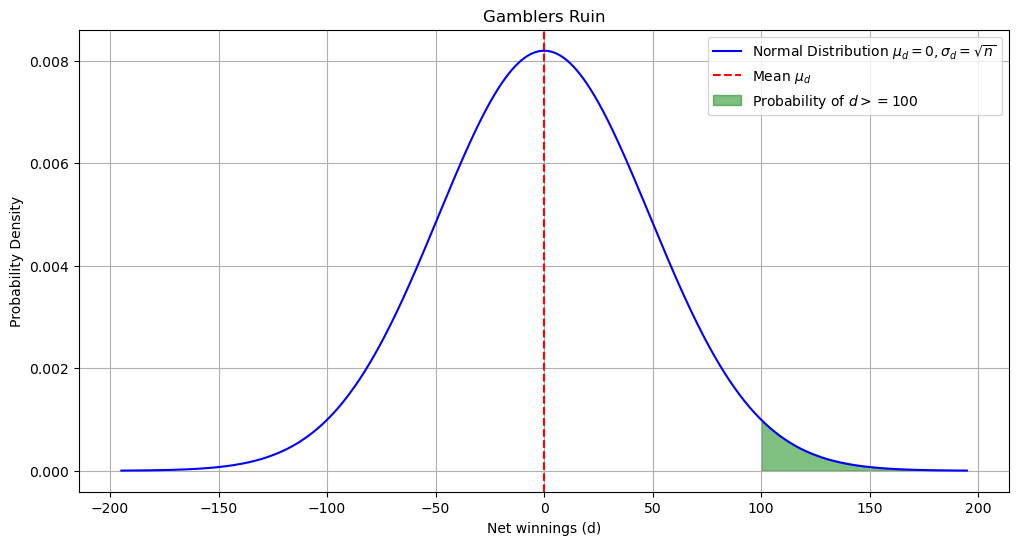

In [8]:
#  Heres some code to ilustrate.  try changing the number of tosses and watch how the green area changes)

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Parameters
n_steps = 2371  # Number of tosses
mu_d = 0  # Mean 
sigma_d = np.sqrt(n_steps)  # Standard deviation 

# Generate values for the x-axis
x = np.linspace(mu_d - 4*sigma_d, mu_d + 4*sigma_d, 1000)
pdf = norm.pdf(x, mu_d, sigma_d)

# Plotting the distribution
plt.figure(figsize=(12, 6))
plt.plot(x, pdf, label=r'Normal Distribution $\mu_d=0, \sigma_d=\sqrt{n}$', color='blue')
plt.axvline(mu_d, color='red', linestyle='--', label=r'Mean $\mu_d$')
plt.fill_between(x, 0, pdf, where=(x >= 100), color='green', alpha=0.5, label='Probability of $d >= 100$')
plt.xlabel('Net winnings (d)')
plt.ylabel('Probability Density')
plt.title('Gamblers Ruin')
plt.legend()
plt.grid(True)
plt.show()


### P6.6 Spread of perfume 
Perfume is released from a small point and diffuses through the air. If the typical mean free path of the perfume molecules is $130$nm  and they have typical velocity $490$ m s$^{-1}$, how long does it take for the smell to reach 1 metre away, according to the standard diffusion calculation? How long does it take to reach 20cm, or 10cm?  Where is the small the strongest? 

Do the results above accord with your experience of how long it takes to detect a spreading smell? If not, why not? 

**Solution**  
The perfume molecules scatter on the air molecules, and should follow a three-dimensional random walk. If we use the peak of the spreading distribution as representing the typical distance travelled, then after  time $t$  we have $l=\sqrt{2v\lambda t}$, and so the time taken for distance $l$ is $t=l^2/2v\lambda$. Putting numbers in:

In [ ]:
v=490  # velocity in m/s
lamnm=130 # step size in nm
lamm=lamnm/1.e9 # step size in metres

l=1.0
tsec= l*l/(2*v*lamm); thr=tsec/3600.
print("time for 1 metre", round(tsec,2), "seconds or ", round(thr,2), "hours")


The time taken goes as $l^2$, so $l=20$cm would take 25 times shorter - about 5 minutes - and to reach $l=10$ cm would take about a minute and a half.

Even though the "peak" of $f(R)$ moves out, the small is always strongest at the release point.  That's because the even though there are more molecules at $R_{peak}$, they are spead across a shell of volume $4\pi R^2 dr$ 

Its always wise to subject solutions to a "sniff test" to see if the numbers smell right. Especially if atomic level units are involved. In this case 5 minutes is not insane, but it does seem rather long. Consider the tail of the distribution, and typical air currents.    Probably this is because the nose is sensitive to very small amounts of molecules, so we don't need to wait for most of it to arrive.  Alternately, air currents may move stuff in bulk faster diffusion.

### P6.7 Sampling the Lorentzian

How does the error on the mean vary for a Lorentzian (Cauchy) disribution?  How about the median? 

####  Solution
We saw before that the error on the mean was $\sigma/\sqrt{N}$.  With infinite $\sigma$, thats a problem for maths. 

For the median, we care only that half the measurements are above the mean, and half below, so the long tail divergence is not a problem.

Lets check it out with code and see that calculations of sample mean and variance don't converge, but the median does.  The variance in particular can be dominated by rare events.

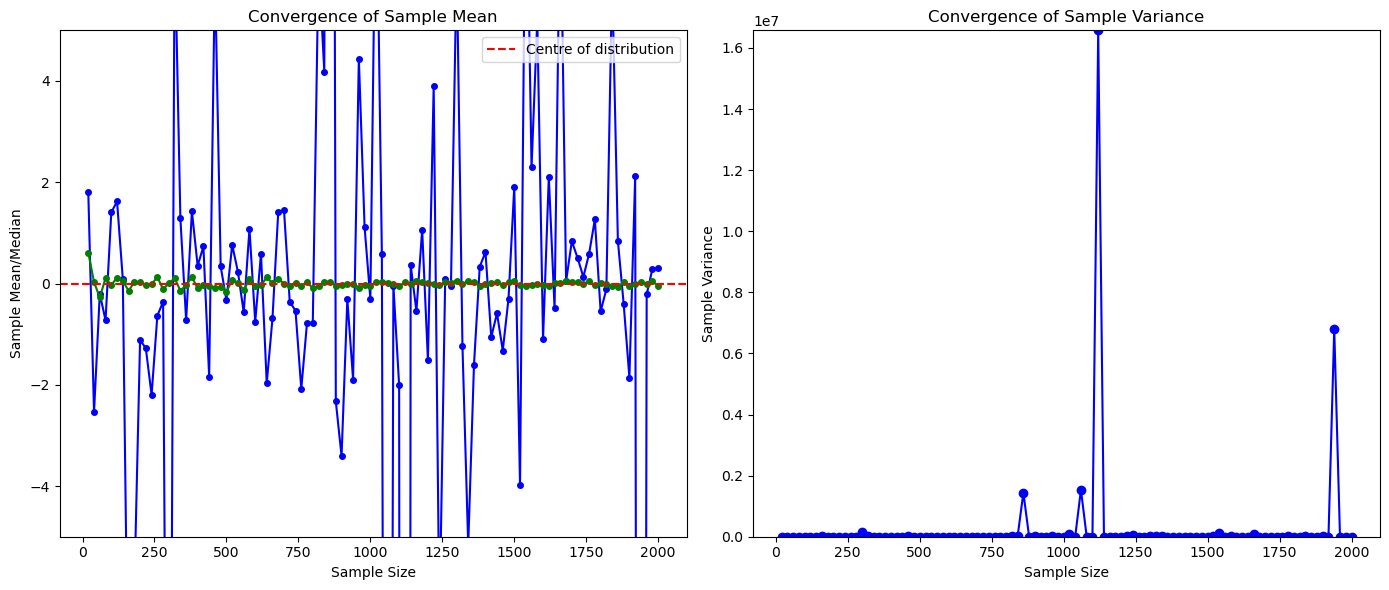

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import cauchy

# Parameters for the Cauchy distribution, with the normalised, centred version
x0 = 0    # location parameter
gamma = 1  # width parameter

# Initialize lists to store results
sample_sizes = []
sample_means = []
sample_variances = []
sample_median = []

# Loop over increasing sample sizes
for n in range(20, 2001, 20):  # Sample sizes from 20 to 2000 in steps of 20
    samples = cauchy.rvs(loc=x0, scale=gamma, size=n)
    sample_sizes.append(n)
    sample_means.append(np.mean(samples))
    sample_variances.append(np.var(samples))
    sample_median.append(np.median(samples))


# Plotting the results
plt.figure(figsize=(14, 6))

# Find largest and smallest values
largest_value = np.max(sample_means)
smallest_value = np.min(sample_means)

# Plot Sample Mean
plt.subplot(1, 2, 1)
plt.plot(sample_sizes, sample_means, marker='o', linestyle='-', color='b',markersize=4)
plt.plot(sample_sizes, sample_median, marker='o', linestyle='-', color='g',markersize=4)
plt.title('Convergence of Sample Mean')
plt.xlabel('Sample Size')
plt.ylabel('Sample Mean/Median')
plt.axhline(y=x0, color='r', linestyle='--', label='Centre of distribution')
plt.legend()
#plt.ylim(smallest_value, largest_value)
plt.ylim(-5, 5)

# Find largest values of variance for plot
largest_var = np.max(sample_variances)


# Plot Sample Variance
plt.subplot(1, 2, 2)
plt.plot(sample_sizes, sample_variances, marker='o', linestyle='-', color='b')
plt.title('Convergence of Sample Variance')
plt.xlabel('Sample Size')
plt.ylabel('Sample Variance')
plt.ylim(0, largest_var)  # Set a reasonable limit to visualize

plt.tight_layout()
plt.show()


### P6.8 Thorium decays 
Radioactive events from a piece of Thorium are observed over a total of 2496 seconds. The time of each event is recorded, and then the time to the next event. The table below shows the observed distribution of intervals.  (This is real data from a 1911 paper.) Does this match what you would expect? Either plot the data with a theoretical curve over the top, or calculate the corresponding expected numbers for each bin.  What is the half life, and how well is it determined?

Time interval(sec) | Number of events |
-------------------| -------------------| 
0 - 1/2  | 101 |
1/2 - 1  | 98 |
1 -2     | 159 |
2 - 3    | 114 |
3 - 4    | 74  |
4 - 5    | 48  |
5 - 7    | 75  |
7 - 10   | 59  |
10 - 15  | 32  |
15 - 20  | 4   |
20 - 30  | 2  |
Over 30  | 0  |


**Solution**  
The decay is a Poisson process, so the distribution of waiting times should follow the exponential distribution, with differential probability density per unit time of

$f(t) = \lambda e^{-\lambda t}$

where $\lambda$ is the rate of events.  We can estimate this because the total number of events is 766 in 2496 seconds, so $\lambda=0.3069$ s$^{-1}$.  This is our mean value for $\lambda$ based on 766 measurements, and its a Poisson, so variance is also $\lambda$ and the error on the mean is $\sqrt{lambda/766}=0.02$.  In fact, its even worse that because of the systematic errors on $x$ from the finite bins.

We can then calculate the expected number of events in each of the bins, watching out for the fact that they are not the same size, and taking the position of each bin as halfway. This gives the following, with predicted numbers rounded to nearest integer. The match is pretty good. To decide whether it's *good enough* to justify the model requires the techniques of chapter 7...

Time interval | Observed number  | Predicted number |
--------------| --------- | -------|
0 - 1/2   |  101  |  109 |
1/2 - 1   |  98   |   93 | 
1 -2      | 159   |  149 | 
2 - 3     | 114   | 110  |
3 - 4     | 74    | 80   |
4 - 5     | 48    | 59   |
5 - 7     | 75    | 76   |
7 - 10    | 59    | 54   |
10 - 15   | 32    | 28   |
15 - 20   | 4     | 6  |
20 - 30   |  2    | 2  |
Over 30   | 0     |  0 |
----------| ------|----|
Total     | 766   | 766 |


Or, use the curve fitting methods from week 1 in codes.

Finally, to convert $\lambda=0.3$ to a half life, its $\ln(2)/\lambda$=2.31sec.    

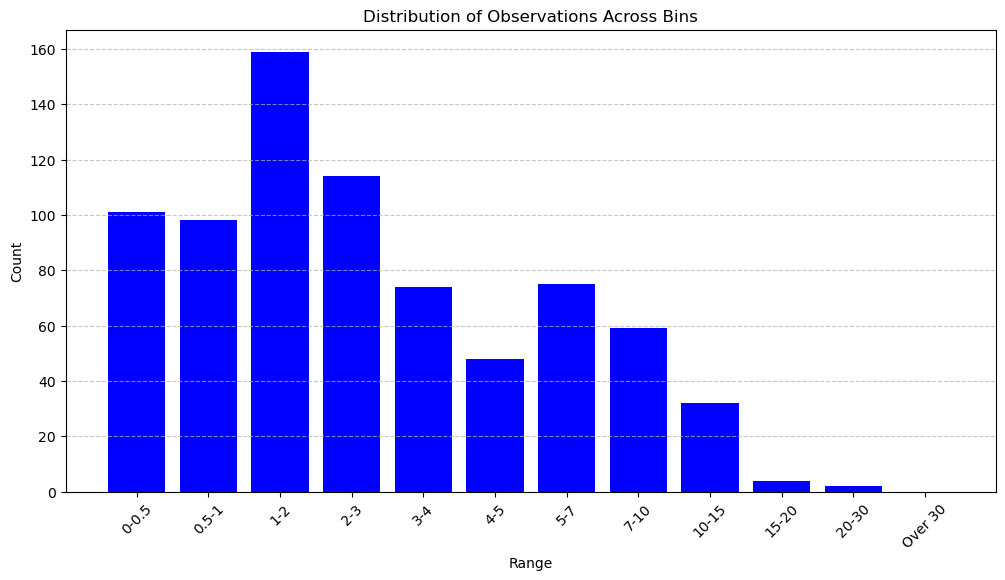

/tmp/ipykernel_1311/1031884878.py:43: RuntimeWarning: overflow encountered in exp
  return a * np.exp(-b * x)


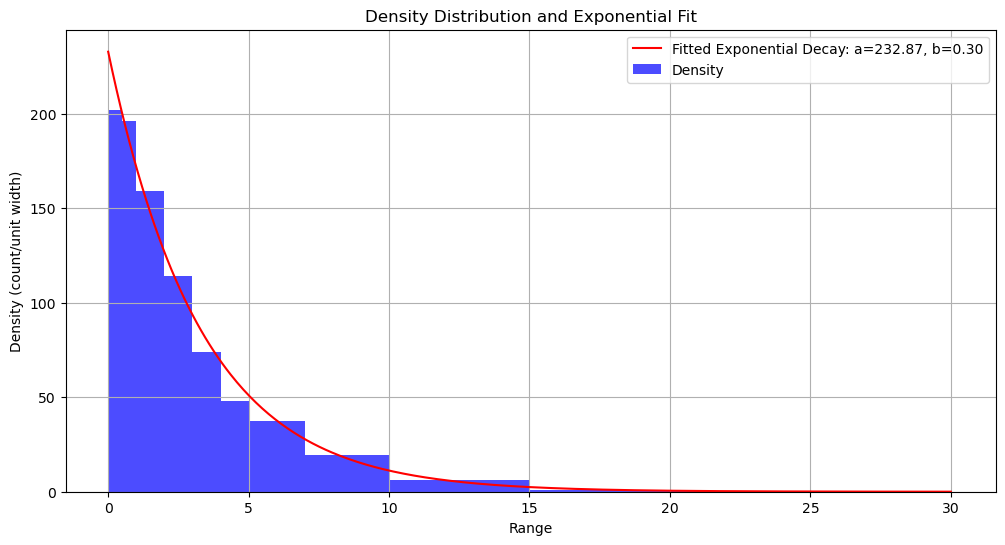

In [8]:
#  And we can plot it with some simple matlibplot
import matplotlib.pyplot as plt
import numpy as np

# Bin ranges for the x-axis 
ranges = ['0-0.5', '0.5-1', '1-2', '2-3', '3-4', '4-5', '5-7', '7-10', '10-15', '15-20', '20-30', 'Over 30']

# The corresponding counts for each bin
counts = [101, 98, 159, 114, 74, 48, 75, 59, 32, 4, 2, 0]

# Creating the plot
plt.figure(figsize=(12, 6))  # Sets the figure size
plt.bar(ranges, counts, color='blue')  # Creates a bar plot

# Adding title and labels
plt.title('Distribution of Observations Across Bins')
plt.xlabel('Range')
plt.ylabel('Count')

# Additional options
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Adding a grid for the y-axis

# Display the plot
plt.show()

#  That's a mess!  lets redo it scaling the bins

import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

# Bins and their respective edges
bin_edges = [0, 0.5, 1, 2, 3, 4, 5, 7, 10, 15, 20, 30, 30.1]
counts = [101, 98, 159, 114, 74, 48, 75, 59, 32, 4, 2, 0]
bin_widths = np.diff(bin_edges)
# The zip() function returns a zip object, which is a set of paired numbers (tuples)
density = [count / width for count, width in zip(counts, bin_widths)]
mid_points = [0.5*(a+b) for a, b in zip(bin_edges[:-1], bin_edges[1:])]

# Define the model function (exponential decay)
def exp_decay(x, a, b):
    return a * np.exp(-b * x)

# Fit the model to the data using curve_fit
params, covariance = curve_fit(exp_decay, mid_points, density)

# Plotting
plt.figure(figsize=(12, 6))
plt.bar(bin_edges[:-1], density, width=bin_widths, align='edge', color="blue", alpha=0.7, label="Density")
plt.plot(np.linspace(0, 30, 400), exp_decay(np.linspace(0, 30, 400), *params), 'r-', label=f"Fitted Exponential Decay: a={params[0]:.2f}, b={params[1]:.2f}")
plt.title('Density Distribution and Exponential Fit')
plt.xlabel('Range')
plt.ylabel('Density (count/unit width)')
plt.legend()
plt.grid(True)
plt.show()





### 6.9 Lorentzian - Gaussian comparison 
If $W_{50}$ means Full Width at 50\% of peak, i.e. FWHM, and $W_{20}$ means Full Width at 20\%, compare $W_{20}/W_{50}$ for the Lorentzian and the Gaussian.

**Solution**  

The Gaussian $W_{50}=2.355$ and $W_{20}=3.588$, in units where $\sigma=1$, i.e. using the standard form.  We can check this using:

print (stats.norm.pdf(0,0,1))

print (stats.norm.pdf(2.355/2,0,1))

print (stats.norm.pdf(3.588/2,0,1))


So $W_{20}/W_{50}=1.52$. 


For the Lorentzian, we can likewise use the standard form with $\mu=0$ and $\Gamma=1$ which is the Cauchy distribution

$$ f(x) = \frac{1}{\pi(1+x^2)} $$

The maximum, at $x=0$ is $f_{max}=1/\pi$. At $f_{max}/N$ we have $f=1/N\pi$. Solving for $x$ we have

$$x^2 = \frac{1}{\pi f} -1 = \frac{1}{\pi}.N\pi -1 = N-1 $$

So for $N=2$ we get $W_{50}=2\times \sqrt{2-1} = 2$.

For $N=5$ we get $W_{20}=2\times \sqrt{5-1} = 4$

So $W_{20}/W_{50}=2$, considerably bigger than for the Gaussian. If we tried 10\%, 5\% etc, the difference would get even larger.


# Level 3 Problems: needs some thought

This weeks level 3 problems investigate some of the limitations arising from asking the wrong question, and how maths appears to go wrong. 

### P6.10 Gambler's ruin, part 2 
Returning to the gambler's ruin problem, what if the game is biassed and 
one wins £1 with 49% probability, and loses £1 with 51%.

We previously measured this for a fair game, estimating that we needed a 2$\sigma$ variation from the mean.  That gave a simple formula  $2\sqrt{n}=100$. $2\sqrt{n}-0.01n=100$. 


Sadly, this has only imaginary solutions.  As $n$ increases  we first see the probability of winning more than £100 increasing, but then it reduces.





### P6.11 Probability of unusual event 
A particle physics experiment measures the energy at which a specific type of collision event occurs. After measuring a few tens of collisions, the distribution of collision energies is observed to have FWHM=0.86 GeV. An event is then seen at an energy $\Delta E =1.16$ GeV away from the mean energy. One of the scientists points out that if we assume the distribution is Gaussian, seeing an event at +1.16 GeV from the mean is extremely unlikely, which therefore suggests a physically different kind of event has been seen. Another scientist however points out that the distribution could actually be Lorentzian - with limited data, near the centre, its hard to tell the difference, but in the wings it is very different. From the observed FWHM, what is the probability of seeing an event with $\Delta E\geq 1.16$ GeV, assuming (a) that the distribution is Gaussian, and (b) that the distribution is Lorentzian? 



**Solution (a): Gaussian**  
Assuming the distribution is Gaussian, we know that FWHM=2.355$\sigma$, and so FWHM=0.86 GeV implies $\sigma=0.365$ GeV. An event seen at +1.16 GeV is therefore at a deviation of $z=+3.18\sigma$. How likely is that? Lets get the one-tailed probability above 3.18$\sigma$:

In [ ]:
z=3.18
P=stats.norm.sf(z,0,1)
print("Gaussian probability of getting event above z=3.18= ",round(P,5))

which is about a 1 in 1351 chance, outside 99.9% confidence limits.

**Solution (b): Lorentzian**

The Lorentzian is. 

$$f(x) = \frac{1}{\pi} \frac{\Gamma/2}{(x-\mu)^2 + (\Gamma/2)^2}$$
with $FWHM=\Gamma$. With a standard form (Cauchy):

$$f(x) = \frac{1}{\pi(x^2 + 1)}$$

For our example FWHM=0.86 GeV and we are at $\Delta E=1.16$ from the mean, so this is equivalent to $x=1.16/(0.86/2)$ in the Cauchy form.

The Cumulative distribution function for Cauchy is 

$$\int_0^x f(x) dx = \frac{1}{\pi} \arctan x$$

Calculating:

I= 0.38709368427965035
Cauchy probability of getting event above x=2.7=  0.11291
Gaussian probability: 0.00075
Lorentzian probability: 0.11300


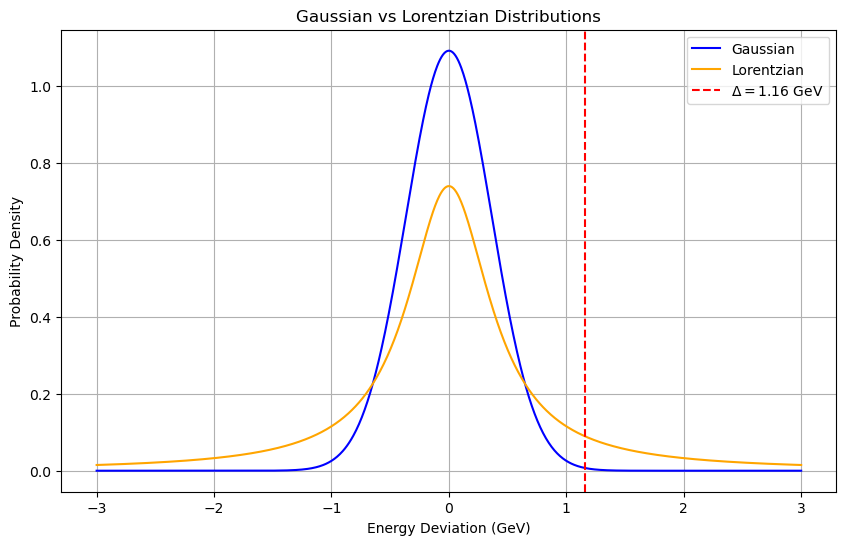

In [19]:
x=2.70
I=np.arctan(x)/pi; print("I=",I)
P=0.5-I
print("Cauchy probability of getting event above x=2.7= ",round(P,5))


from scipy.stats import norm, cauchy

# Parameters
FWHM = 0.86
sigma = FWHM / (2 * np.sqrt(2 * np.log(2)))
mu = 0  # Assume mean is at 0 for simplicity
Delta = 1.16

# Gaussian Distribution
p_gaussian = 1 - norm.cdf(Delta, loc=mu, scale=sigma)

# Lorentzian Distribution
G = FWHM / 2
p_lorentzian = 1 - cauchy.cdf(Delta, loc=mu, scale=G)

print(f"Gaussian probability: {p_gaussian:.5f}")
print(f"Lorentzian probability: {p_lorentzian:.5f}")

# Generate values for plotting
x = np.linspace(-3, 3, 1000)
gaussian_pdf = norm.pdf(x, loc=mu, scale=sigma)
lorentzian_pdf = cauchy.pdf(x, loc=mu, scale=G)

# Plot the distributions
plt.figure(figsize=(10, 6))
plt.plot(x, gaussian_pdf, label='Gaussian', color='blue')
plt.plot(x, lorentzian_pdf, label='Lorentzian', color='orange')
plt.axvline(Delta, color='red', linestyle='--', label=f'$\Delta = {Delta}$ GeV')
plt.xlabel('Energy Deviation (GeV)')
plt.ylabel('Probability Density')
plt.title('Gaussian vs Lorentzian Distributions')
plt.legend()
plt.grid(True)
plt.show()


So if the distribution is actually Lorentzian, there is an 11% chance of seeing such an event. This is enormously different from the Gaussian estimate, so the first scientist could be making a big mistake claiming a discovery! 

### P6.12 Share prices 
An investor is considering two forestry companies whose shares are valued at £100 and rise or fall with 50% probability.   Plancktastic has a share price which rises or falls randomly by £1 each week.  LogsRUs  shares increase or fall randomly by a factor of 1.01. What are the associated distributions and which is the better bet?  

**Solution**

Plancktastic shares follow a standard random walk and can be modelled as a Gaussian distribution.  After $n$ weeks it will have a mean price of £100 and a variance of $\sqrt{n}$.  There is a small chance the price will have gone to zero, and the company ceased trading, but that does not affect the averages.

For LogsRUs we also have a random walk, but this time in the logarithm of the price. we have to transform the variable from price $x$ to $y=\log(x)$ The distribution is therefore a lognormal, for which the mean   is $\exp(\mu_y+\sigma_y^2/2)=100.\exp(\sigma_y^2/2)$.  Since the variance in log(price) is increasing over time, so is the mean shareprice in pounds $<x>$ - although not in log(price) $<y>$.  If this seems odd, consider what happens in week 1.  There's a 50% chance that the shareprice is £101.00, and a 50% chance it is £99.01.  Those extra pennies mount up.    

However, the fluctuations for the LogsRUs price are also bigger, and the mode value is lower.

Plancktastic Mean Return after 1 Year: £100.00
LogsRUs Mean Return after 1 Year: £167.77


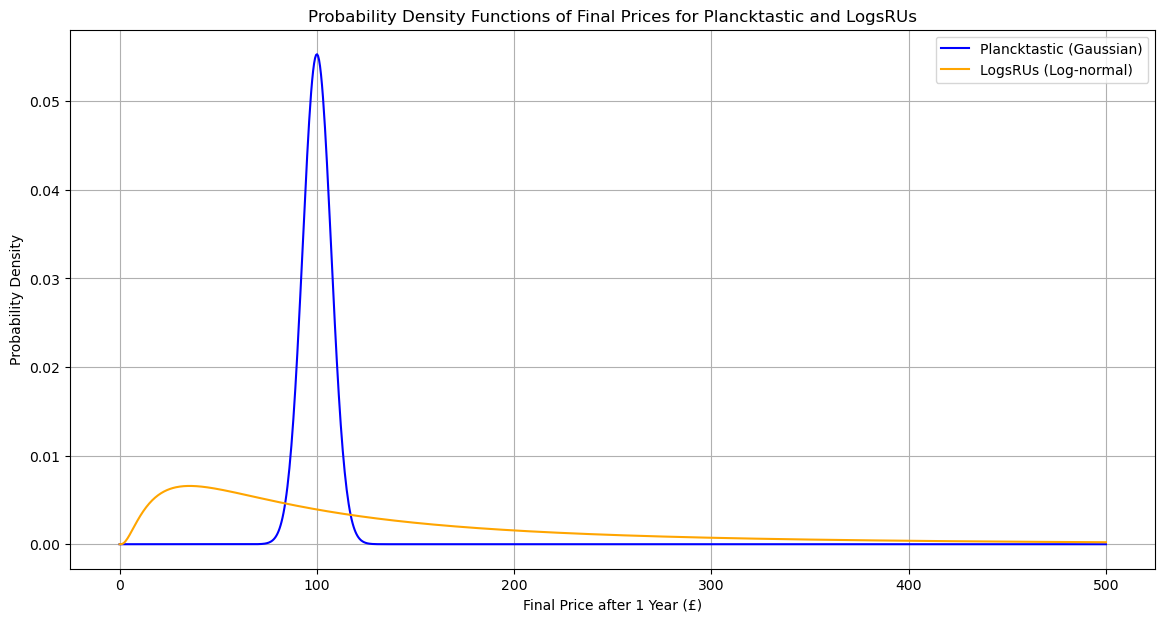

In [37]:

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, lognorm

# Parameters
weeks = 52  # 1 year of weeks
initial_price = 100
trials = 1000

# Plancktastic: Gaussian distribution approximation
mu_plancktastic = initial_price
sigma_plancktastic = np.sqrt(weeks)  # Standard deviation grows with sqrt(time)

# LogsRUs: Log-normal distribution
mu_logsrus = 0
sigma_logsrus = np.sqrt(weeks * np.log(1.01**2))  # Log-normal scale parameter
scale_logsrus = initial_price

# Generate values for x
x_plancktastic = np.linspace( 0, 500,1000)
x_logsrus = np.linspace(0, 500, 1000)

# Plancktastic: Gaussian PDF
pdf_plancktastic = norm.pdf(x_plancktastic, loc=mu_plancktastic, scale=sigma_plancktastic)

# LogsRUs: Log-normal PDF
pdf_logsrus = lognorm.pdf(x_logsrus, s=sigma_logsrus, scale=scale_logsrus)

# Plancktastic: Gaussian distribution approximation
mu_plancktastic = initial_price
sigma_plancktastic = np.sqrt(weeks)  # Standard deviation grows with sqrt(time)

# LogsRUs: Log-normal distribution
mu_logsrus = 0
sigma_logsrus = np.sqrt(weeks * np.log(1.01**2))  # Log-normal scale parameter
scale_logsrus = initial_price

# Mean returns
mean_return_plancktastic = mu_plancktastic
mean_return_logsrus = lognorm.mean(s=sigma_logsrus, scale=scale_logsrus)

print(f"Plancktastic Mean Return after 1 Year: £{mean_return_plancktastic:.2f}")
print(f"LogsRUs Mean Return after 1 Year: £{mean_return_logsrus:.2f}")

# Plotting the distributions
plt.figure(figsize=(14, 7))

plt.plot(x_plancktastic, pdf_plancktastic, label='Plancktastic (Gaussian)', color='blue')
plt.plot(x_logsrus, pdf_logsrus, label='LogsRUs (Log-normal)', color='orange')
plt.xlabel('Final Price after 1 Year (£)')
plt.ylabel('Probability Density')
plt.title('Probability Density Functions of Final Prices for Plancktastic and LogsRUs')
plt.legend()
plt.grid(True)
plt.show()



### P6.13  Sandpile simulation  (Exam style question)

A simple model for a sandpile due to Per Bak.
Each point of a lattice has a "height" above its neighbour. If this gets bigger than 4, then one grain falls onto each neighbouring site. If that causes the neighbour to be bigger than 4, then one grain falls onto each of its neighbouring sites.  And so on.  At each step, four grains of sand are dropped onto the central site, which sets off the avalanche.

For practical purposes, we have a finite area, and grains falling off the edge are lost. 
Write a code to simulate the system, and measure the distribution of avalanche sizes.

Show that the PDF for the avalanche size follows a power law and estimate the power

In [ ]:
len_xy=300
maxG=4
sanddrop=10000
pfall=1   # allow for stochastic fall, in simple case toohig pile always falls
#  Area contains the height of the sandpile at each point above its neighbours
area=np.zeros((len_xy,len_xy))
grainsFallen = maxG * pfall;
# Store size of avalanches

avalancheSize = np.zeros((10000))
for i in range(len(avalancheSize)):
        avSize = 0
        # Add maxG grains to the centre site 
        area[int(len_xy/2),int(len_xy/2)] += maxG    
        # run until a stable state is reached
        while np.max(area) >= maxG:
            # create an array where grains will fall
            toohigh = area >= maxG
            avSize += maxG * np.sum(toohigh)
            # decrease too high piles
            area[toohigh] -= maxG
            # increase adjacent piles on square lattice
            area[1:,:][toohigh[:-1,:]] += maxG / 4
            area[:-1,:][toohigh[1:,:]] += maxG / 4
            area[:,1:][toohigh[:,:-1]] += maxG / 4
            area[:,:-1][toohigh[:,1:]] += maxG / 4
    
        avalancheSize[i] = avSize/4

#  we sort the array ready for plotting        
sorted=np.sort(avalancheSize)

#Then plot on linear and log graphs
plt.plot(sorted)
plt.xlabel("index") 
plt.ylabel("size of avalanche") 
plt.show()

plt.plot(np.log(sorted))
plt.xlabel("index")
plt.ylabel("log size") 
plt.xlabel("index")
plt.show()
histo=np.histogram(sorted, bins=100, density=True)
col=histo[0]
#  For the log plot, loglog deals gracefully with zeroes
plt.loglog(col)
plt.xlabel("log frequency")
plt.ylabel("log size") 
plt.show()